#청와대 청원 : 청원의 주제가 무엇일까?

템플릿 출처 : https://dacon.io/competitions/open/235597/codeshare/1737?page=1&dtype=recent

## 구글 드라이브와 Colab 연동

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


##라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

##데이터 불러오기

In [3]:
!cp /content/gdrive/MyDrive/cau_temp/cwd.zip ./

In [4]:
!unzip cwd.zip

Archive:  cwd.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
#데이터 폴더 생성
!mkdir data
!mv train.csv data/
!mv test.csv data/
!mv sample_submission.csv data/

##데이터 전처리 

In [6]:
#데이터 불러오기 
train_data = pd.read_csv('/content/data/train.csv').iloc[:, 1:].dropna(how = 'any')
train_data.index = range(len(train_data))
test_data = pd.read_csv('/content/data/test.csv').iloc[:, 1:]
submission = pd.read_csv('/content/data/sample_submission.csv')

In [7]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

### 데이터 클리닝

#### 특수문자 삭제

In [8]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [9]:
train_data.data = clean_text(train_data.data)
test_data.data = clean_text(test_data.data)

##### train data 엔터 입력 공백으로 변환

In [10]:
train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

100%|██████████| 39992/39992 [00:00<00:00, 409991.53it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


##### train data 특수문자 공백으로 변환

In [11]:
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


##### test data 엔터 입력 공백으로 변환

In [12]:
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 5000/5000 [00:00<00:00, 355244.77it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


##### test data 특수문자 공백으로 변환

In [13]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


#### Mecab을 활용한 형태소(한국 불용어) 분류

##### Mecab설치를 위한 환경조성

In [14]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [66.6 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://arch

In [15]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64


In [16]:
#Mecab 설치 , 출처 : https://riverside13.tistory.com/entry/colab%EC%97%90-konlpy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0?category=658870
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1130k      0  0:00:01  0:00:01 --:--:-- 2558k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [17]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

#참고 : https://colab.research.google.com/github/ikarus-999/AI-NLP-Study/blob/master/NLP_02.ipynb#scrollTo=np7H9-Jkp1CH

In [18]:
mecab = Mecab()

##### 실행

In [19]:
stop_df = pd.read_csv('/content/gdrive/MyDrive/cau_temp/한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

#한국어불용어100.txt 다운로드 출처 : https://bab2min.tistory.com/544

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [20]:
#종결어
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [21]:
stop_words = list(stop_df.형태)

In [22]:
ind_list = [24885, 14916, 14605, 6641, 17406, 26957, 2175, 6885, 8947, 14966, 8198, 25955, 39167,21707, 12678,
           3023, 31971, 3730, 37153, 33481, 33369, 12927, 30773, 36431,12373,  37525,27530, 8958, 16884, 18072,
           4478, 7940, 16400, 16656]
train_data_sample = train_data.query('index not in @ind_list')
train_data.index = range(0, len(train_data))
print(train_data_sample)

       category  ...                                         clear_text
0             2  ...  신혼부부위한 주택정책 보다 보육시설 늘려주세요   국민세금으로 일부를 위한 정책펴지...
1             0  ...  학교이름에  남자 도 붙여주세요  울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2             1  ...  빙상연맹  대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요   최근 동계올...
3             1  ...  티비 세 세 관람가도 연령확인 의무화 하자   제기 에전에 티비를 보다가 잠시 딴일...
4             1  ...  무더운 여름철엔 남성들도 시원한 자율복장을 해야  무더운 여름철에는 남성들도 노넥타...
...         ...  ...                                                ...
39987         2  ...  시간유연근무제  저는 국립대에서 일하고 있는 비정규직 근로자입니다 동시에 두 자녀의...
39988         0  ...  소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다  소년...
39989         2  ...  무서운데 지켜야 할게 있어요 도와주세요  안녕하세요   한부모엄마 입니다 양육비를 ...
39990         2  ...  교복에 고정식 이름표를 달게 하는 것을 금지해 주세요   교복에 이름표를 박아놓아 ...
39991         0  ...  합의성관계 가능 나이연령을 올리십시오  제가 형법공부를하다가 문제를풀고있는데금지착오...

[39958 rows x 3 columns]


In [85]:
print (temp_X)

['기저귀', '장소', '공공', '기관', '활용', '손자', '생후', '개월', '초보', '할머니', '가족', '제주도', '여행', '상황', '손자', '기저귀', '공식', '장소', '가능', '공원', '벤치', '그건', '화장실', '세면대', '아기', '권리', '화장실', '세면대', '깔개', '기저귀', '초보', '할머니', '제안', '공공', '기관', '우체국', '동사무소', '경찰서', '은행', '기저귀', '공간', '의무', '표지판', '공간', '부족', '이동식', '가리개', '접이식', '아기', '침대', '비치', '필요', '사용', '공간', '엄마', '아기', '기저귀']


In [23]:
train_data = train_data.query('index not in @ind_list')
train_data.index = range(0, len(train_data))

In [24]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 39958/39958 [00:56<00:00, 710.66it/s]


In [25]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 5000/5000 [00:07<00:00, 710.25it/s]


##모델링

### 모델링을 위한 라이브러리 불러오기

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau 
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [28]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45144
등장 빈도가 10번 이하인 희귀 단어의 수: 32528
단어 집합에서 희귀 단어의 비율: 72.05387205387206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.252869446328218


In [29]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12617


In [30]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [31]:
y_train = to_categorical(np.array(train_data['category']))

In [32]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]

In [87]:
# 빈 샘플들을 제거(결측치 핸들링)
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39933
39933


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [34]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [88]:
max_len = 300 # max_len을 300으로 설정하면 97%의 데이터를 사용하므로 계산에 이득
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 97.22284827085367


In [86]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

In [37]:
#추가 라이브러리
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

In [38]:
# 실시간 로스 추출하는 함수 
# 출처 : https://colab.research.google.com/github/dhrim/cau_2021/blob/master/material/deep_learning/dnn_in_keras_callback.ipynb#scrollTo=W7R1CYyWpVlY
class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [39]:
plot_losses = PlotLosses()

### 모델 생성 및 훈련

In [40]:
from datetime import datetime
import os
path = "/content/data"

####모델 1

In [72]:
model = Sequential()
model.add(Embedding(vocab_size,64, input_length=max_len))
model.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01))) 
model.add(GlobalMaxPooling1D())
model.add(Flatten()) #1차원 배열로 만들어주기
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           807488    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 300, 64)           20544     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 828,227
Trainable params: 828,227
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer=RMSprop(learning_rate = .0005), loss='categorical_crossentropy', metrics=['acc'])
reduce_learning_rate = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2) # 학습율 조정
early_stopping = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2) # ealrystopping으로 계산시간 줄임 
#출처 : https://colab.research.google.com/github/dhrim/cau_2021/blob/master/material/deep_learning/dnn_in_keras_callback.ipynb
mc = ModelCheckpoint(filepath = '1028_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

In [74]:
history = model.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64*2, shuffle = True, validation_split=0.2, verbose = 1, callbacks=[early_stopping, mc, reduce_learning_rate])

Epoch 1/30
250/250 [==============================] - 3s 8ms/step - loss: 0.9753 - acc: 0.7778 - val_loss: 0.5692 - val_acc: 0.8531

Epoch 00001: val_acc improved from -inf to 0.85314, saving model to 1028_1.h5
Epoch 2/30
250/250 [==============================] - 2s 7ms/step - loss: 0.4904 - acc: 0.8574 - val_loss: 0.4427 - val_acc: 0.8635

Epoch 00002: val_acc improved from 0.85314 to 0.86353, saving model to 1028_1.h5
Epoch 3/30
250/250 [==============================] - 2s 7ms/step - loss: 0.4101 - acc: 0.8682 - val_loss: 0.4004 - val_acc: 0.8662

Epoch 00003: val_acc improved from 0.86353 to 0.86616, saving model to 1028_1.h5
Epoch 4/30
250/250 [==============================] - 2s 7ms/step - loss: 0.3739 - acc: 0.8736 - val_loss: 0.3801 - val_acc: 0.8708

Epoch 00004: val_acc improved from 0.86616 to 0.87079, saving model to 1028_1.h5
Epoch 5/30
250/250 [==============================] - 2s 7ms/step - loss: 0.3513 - acc: 0.8797 - val_loss: 0.3678 - val_acc: 0.8729

Epoch 00005: v

val_loss: 0.3460 , val_acc: 0.8774

In [75]:
model = load_model('1028_1.h5')

##### 모델 1 Loss와 Accuracy 그래프

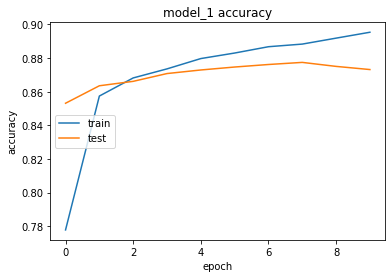

In [76]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='center left')
plt.show()

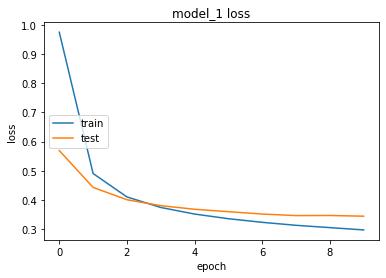

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

#### 모델 2

In [47]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 128, input_length = max_len))
model2.add(Conv1D(256, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 128)          1614976   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 256)          164096    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 55, 64)            81984     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)               

In [52]:
model2.compile(optimizer = RMSprop(learning_rate = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min', verbose = 1), ModelCheckpoint(filepath =  os.path.join(path, '1028_2.h5'), monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 256, verbose = 1, validation_split = 0.2, callbacks=[callback_ear])

Epoch 1/15
125/125 [==============================] - 6s 44ms/step - loss: 0.1852 - acc: 0.9702 - val_loss: 0.5289 - val_acc: 0.8653

Epoch 00001: val_acc improved from -inf to 0.86528, saving model to /content/data/1028_2.h5
Epoch 2/15
125/125 [==============================] - 5s 37ms/step - loss: 0.1609 - acc: 0.9764 - val_loss: 0.5762 - val_acc: 0.8598

Epoch 00002: val_acc did not improve from 0.86528
Epoch 3/15
125/125 [==============================] - 5s 37ms/step - loss: 0.1493 - acc: 0.9773 - val_loss: 0.5487 - val_acc: 0.8670

Epoch 00003: val_acc improved from 0.86528 to 0.86703, saving model to /content/data/1028_2.h5
Epoch 4/15
125/125 [==============================] - 5s 38ms/step - loss: 0.1367 - acc: 0.9804 - val_loss: 0.5388 - val_acc: 0.8645

Epoch 00004: val_acc did not improve from 0.86703
Epoch 00004: early stopping


val_loss: 0.5487, val_acc: 0.8670

In [53]:
model2 = load_model( os.path.join(path, '1028_2.h5')) 

##### 모델 2 Loss와 Accuracy 그래프

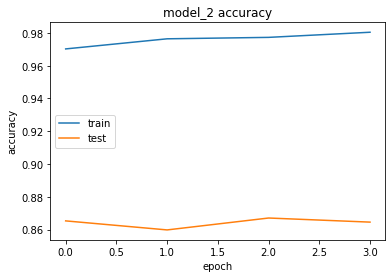

In [54]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='center left')
plt.show()

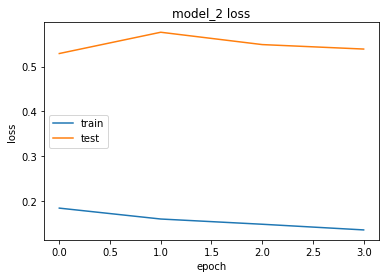

In [55]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

#### 모델 3

In [56]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(64, 5, activation='relu'))
model3.add(Conv1D(64, 5, activation='relu'))
model3.add(Conv1D(64, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(32))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           807488    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 296, 64)           20544     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 292, 64)           20544     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 288, 64)           20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 72, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [57]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate= .0005), metrics=['acc'])

In [58]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 3, verbose = 1), ModelCheckpoint(filepath =  os.path.join(path, '1028_3.h5'), monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=512, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
63/63 [==============================] - 6s 53ms/step - loss: 0.7549 - acc: 0.6429 - val_loss: 0.4414 - val_acc: 0.8470

Epoch 00001: val_acc improved from -inf to 0.84700, saving model to /content/data/1028_3.h5
Epoch 2/30
63/63 [==============================] - 3s 44ms/step - loss: 0.3924 - acc: 0.8589 - val_loss: 0.3602 - val_acc: 0.8685

Epoch 00002: val_acc improved from 0.84700 to 0.86854, saving model to /content/data/1028_3.h5
Epoch 3/30
63/63 [==============================] - 3s 44ms/step - loss: 0.3247 - acc: 0.8854 - val_loss: 0.3863 - val_acc: 0.8576

Epoch 00003: val_acc did not improve from 0.86854
Epoch 4/30
63/63 [==============================] - 3s 44ms/step - loss: 0.2844 - acc: 0.8990 - val_loss: 0.3754 - val_acc: 0.8682

Epoch 00004: val_acc did not improve from 0.86854
Epoch 5/30
63/63 [==============================] - 3s 44ms/step - loss: 0.2544 - acc: 0.9096 - val_loss: 0.3702 - val_acc: 0.8662

Epoch 00005: val_acc did not improve from 0.86854
Epo

val_loss: 0.3754, val_acc: 0.8682

In [59]:
model3 = load_model(os.path.join(path, '1028_3.h5'))

##### 모델 3 Loss와 Accuracy 그래프

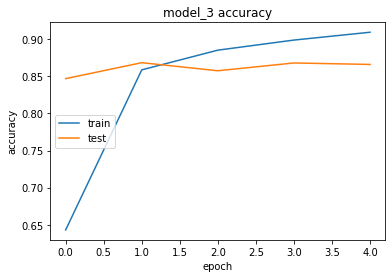

In [60]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='center left')
plt.show()

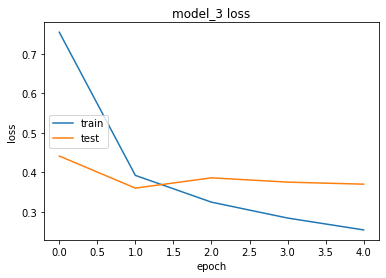

In [61]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

#### 모델 4

In [62]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 32, input_length=max_len))
model4.add(Dropout(0.3))
model4.add(Conv1D(32, 5, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(32))
model4.add(Dense(3, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 32)           403744    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 296, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 74, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 417,315
Trainable params: 417,315
Non-trainable params: 0
________________________________________________

In [63]:
model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate= .0005), metrics=['acc'])

In [64]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = os.path.join(path, '1028_4.h5'), monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history4 = model4.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
500/500 [==============================] - 6s 9ms/step - loss: 0.5780 - acc: 0.7623 - val_loss: 0.3597 - val_acc: 0.8700

Epoch 00001: val_acc improved from -inf to 0.87004, saving model to /content/data/1028_4.h5
Epoch 2/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3268 - acc: 0.8777 - val_loss: 0.3244 - val_acc: 0.8799

Epoch 00002: val_acc improved from 0.87004 to 0.87993, saving model to /content/data/1028_4.h5
Epoch 3/30
500/500 [==============================] - 4s 8ms/step - loss: 0.2907 - acc: 0.8908 - val_loss: 0.3190 - val_acc: 0.8806

Epoch 00003: val_acc improved from 0.87993 to 0.88056, saving model to /content/data/1028_4.h5
Epoch 4/30
500/500 [==============================] - 4s 8ms/step - loss: 0.2719 - acc: 0.8955 - val_loss: 0.3206 - val_acc: 0.8797

Epoch 00004: val_acc did not improve from 0.88056
Epoch 5/30
500/500 [==============================] - 4s 8ms/step - loss: 0.2610 - acc: 0.9014 - val_loss: 0.3197 - val_acc: 0.8811

Epo

val_loss: 0.3224, val_acc: 0.8826

##### 모델 4 Loss와 Accuracy 그래프

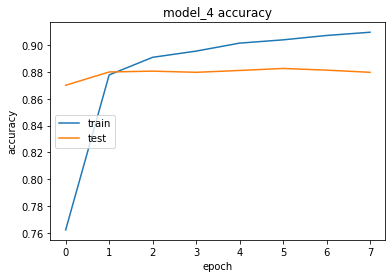

In [65]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model_4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='center left')
plt.show()

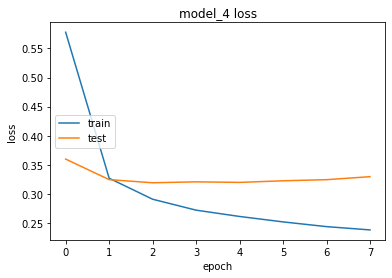

In [66]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model_4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

## 카테고리 예측하기

### 모델 앙상블

In [67]:
y_pred = model.predict(pad_X_test)
y_pred_2 = model2.predict(pad_X_test)
y_pred_3 = model3.predict(pad_X_test)
y_pred_4 = model4.predict(pad_X_test)

In [68]:
mean_pred = .1 * y_pred + .3 * y_pred_2 + .2 * y_pred_3 + .4 * y_pred_4

In [69]:
mean_pred = model.predict(pad_X_test)
sample_submission = pd.read_csv('/content/data/sample_submission.csv')
sample_submission['category'] = np.argmax(y_pred, axis=-1)
sample_submission.head()

,index,category
0,0,2
1,1,2
2,2,1
3,3,0
4,4,2


### 예측으로 도출된 값 csv로 따로 저장

In [70]:
submission.to_csv(os.path.join(path, "ens_result.csv"), index = False)

In [71]:
ens_result = pd.read_csv('/content/data/ens_result.csv')
ens_result['category'] = np.argmax(y_pred, axis=-1)